### CALIFORNIA PRICE PREDICTION

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/tphathuin1802/california-housing-price-prediction/refs/heads/main/data/housing.csv'); df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [72]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [73]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

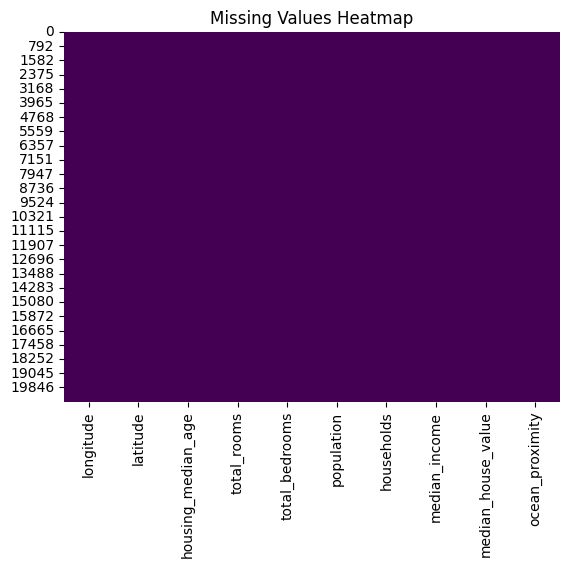

In [91]:
for col in df.columns:
    missing = df[col].isnull().sum()
    missing_percentage = (missing / len(df)) * 100
    if missing > 0:
        print(f"{col}: {missing} missing values ({missing_percentage:.2f}%)")
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

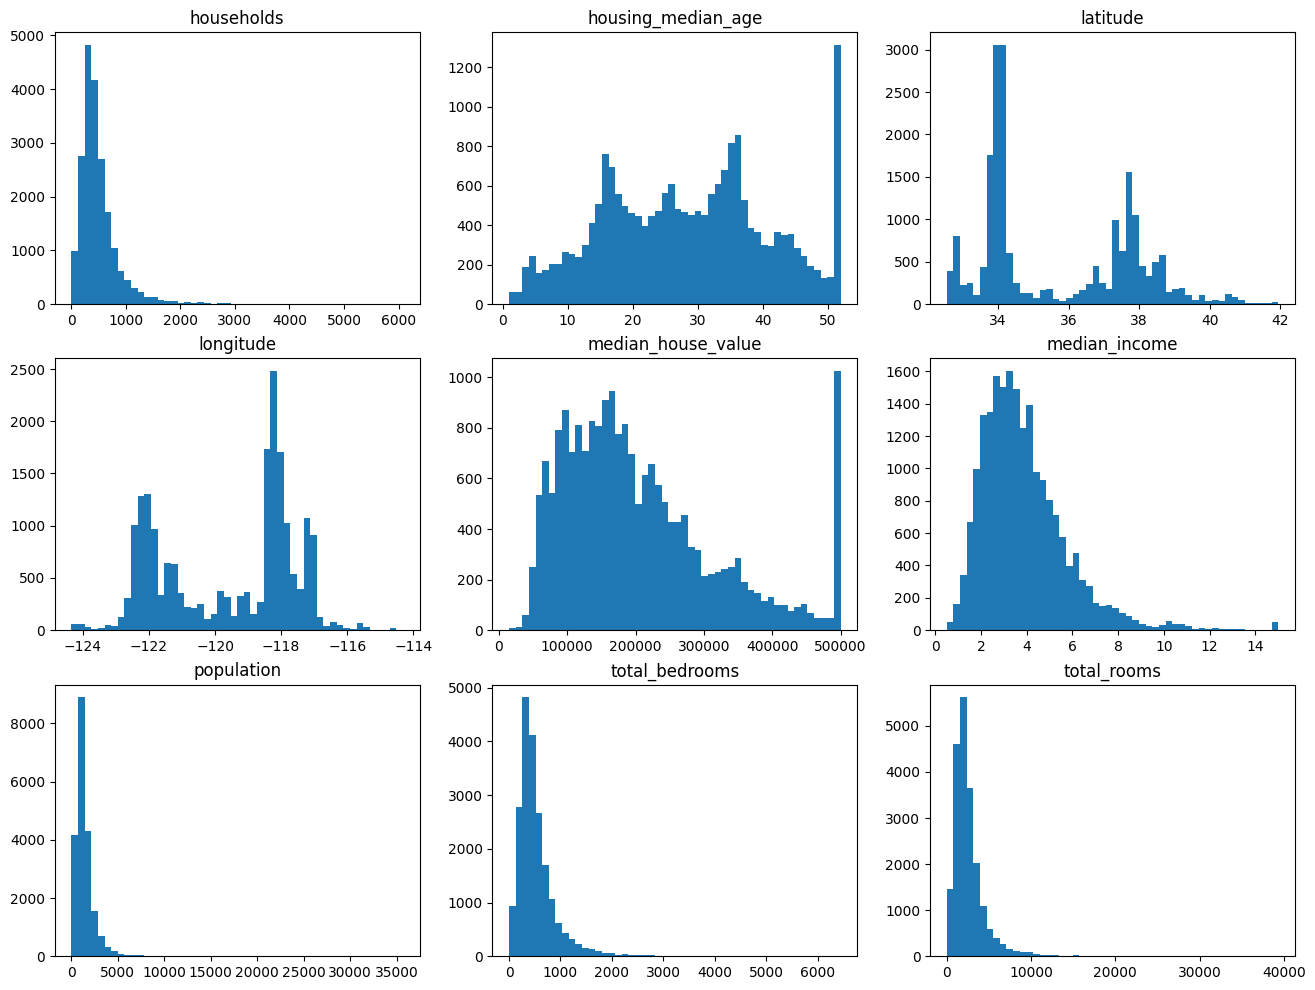

In [77]:
fig, axs = plt.subplots(3,3, figsize=(16,12))
axs[0,0].hist(df["households"], bins=50)
axs[0,0].set_title("households")

axs[0,1].hist(df["housing_median_age"], bins=50)
axs[0,1].set_title("housing_median_age")

axs[0,2].hist(df["latitude"], bins =50)
axs[0,2].set_title("latitude")

axs[1,0].hist(df["longitude"], bins=50)
axs[1,0].set_title("longitude")

axs[1,1].hist(df["median_house_value"], bins=50)
axs[1,1].set_title("median_house_value")

axs[1,2].hist(df["median_income"], bins=50)
axs[1,2].set_title("median_income")

axs[2,0].hist(df["population"], bins=50)
axs[2,0].set_title("population")

axs[2,1].hist(df["total_bedrooms"], bins=50)
axs[2,1].set_title("total_bedrooms")

axs[2,2].hist(df["total_rooms"], bins=50)
axs[2,2].set_title("total_rooms")

plt.show()

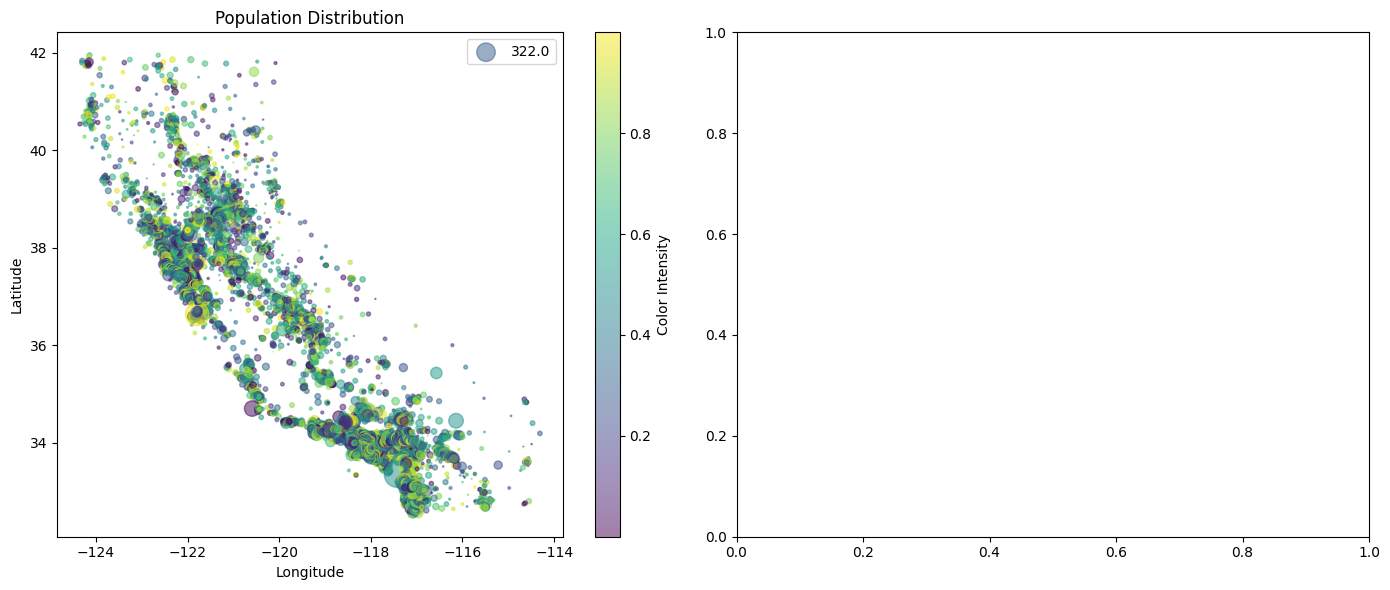

In [78]:

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
rng = np.random.default_rng()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1:
colors = rng.random(len(df))
scatter = axs[0].scatter(df["longitude"], df["latitude"], s=df["population"]/100, c=colors, cmap="viridis", alpha=0.5)
fig.colorbar(scatter, ax=axs[0], label="Color Intensity")
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
axs[0].set_title("Population Distribution")
axs[0].legend(df["population"])


plt.tight_layout()
plt.show()



In [79]:
from sklearn.model_selection import train_test_split

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
train_df = X_train.join(y_train)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6748,-118.07,34.11,47.0,832.0,194.0,419.0,156.0,3.1576,<1H OCEAN,225000.0
5137,-118.27,33.97,45.0,1546.0,371.0,1186.0,366.0,1.6400,<1H OCEAN,96800.0
11692,-117.99,33.87,34.0,1239.0,307.0,869.0,291.0,3.5900,<1H OCEAN,161900.0
16097,-122.50,37.75,45.0,1672.0,344.0,838.0,314.0,4.1419,NEAR OCEAN,291500.0
8619,-118.38,33.86,29.0,2787.0,475.0,1182.0,444.0,6.7613,<1H OCEAN,352700.0
...,...,...,...,...,...,...,...,...,...,...
4486,-118.20,34.05,8.0,762.0,204.0,728.0,174.0,2.4886,<1H OCEAN,137500.0
11426,-117.98,33.70,17.0,1997.0,340.0,952.0,341.0,4.4148,<1H OCEAN,239200.0
4118,-118.22,34.14,52.0,1388.0,271.0,735.0,239.0,3.7404,<1H OCEAN,247700.0
10857,-117.86,33.71,21.0,1795.0,406.0,2246.0,400.0,3.1520,<1H OCEAN,152800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

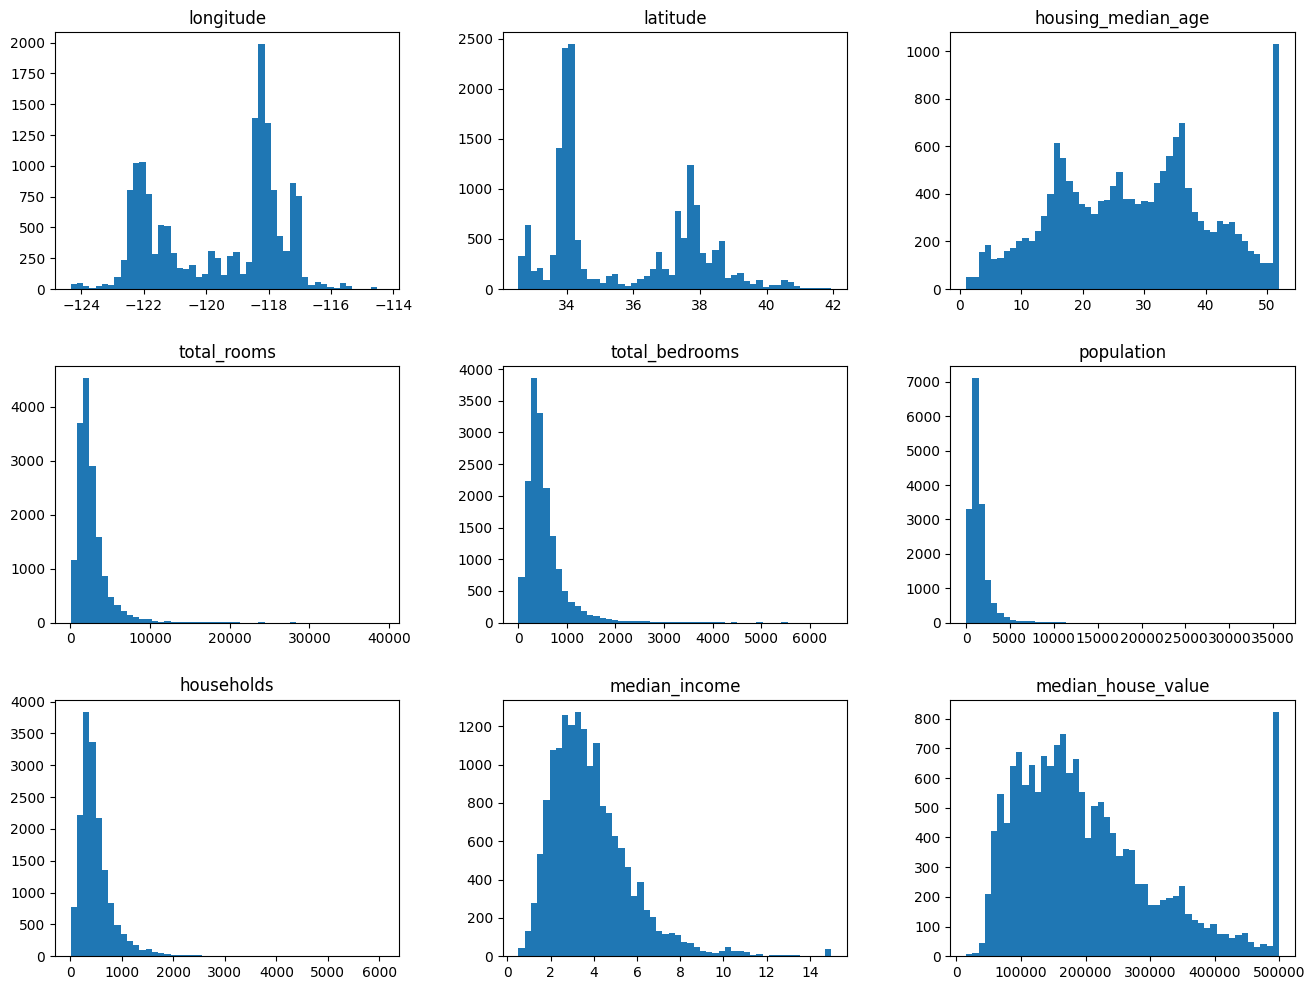

In [81]:
train_df.hist(figsize=(16, 12), bins=50, grid=False)

<Axes: >

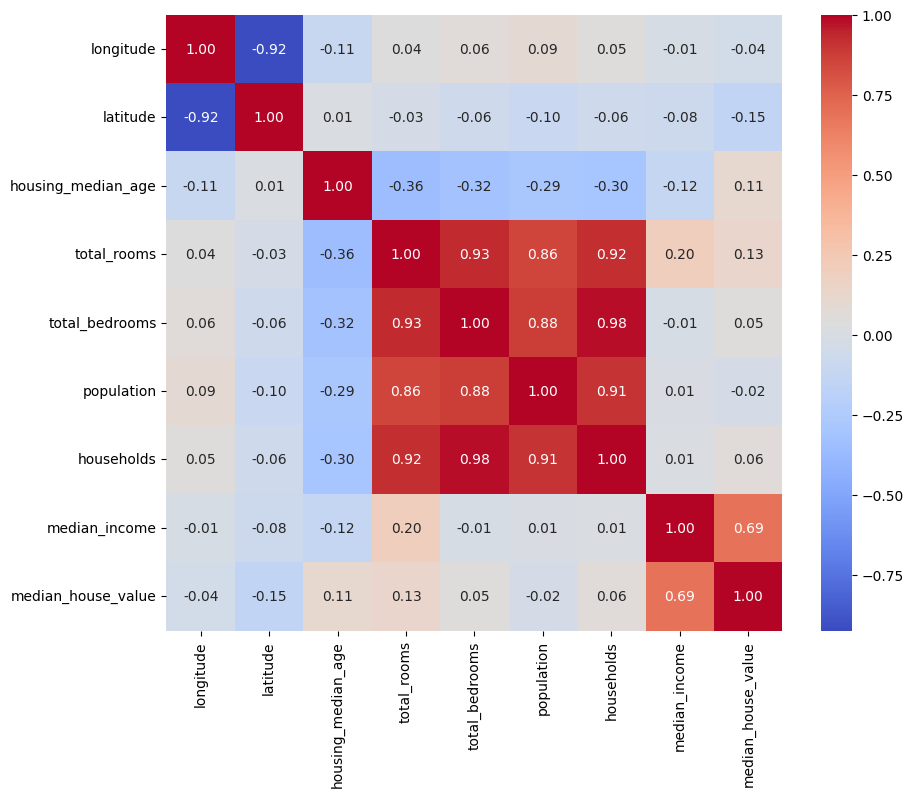

In [82]:
import numpy as np
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

In [83]:
train_df["total_rooms"] = np.log(train_df["total_rooms"] + 1)
train_df["total_bedrooms"] = np.log(train_df["total_bedrooms"] + 1)
train_df["population"] = np.log(train_df["population"] + 1)
train_df["households"] = np.log(train_df["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

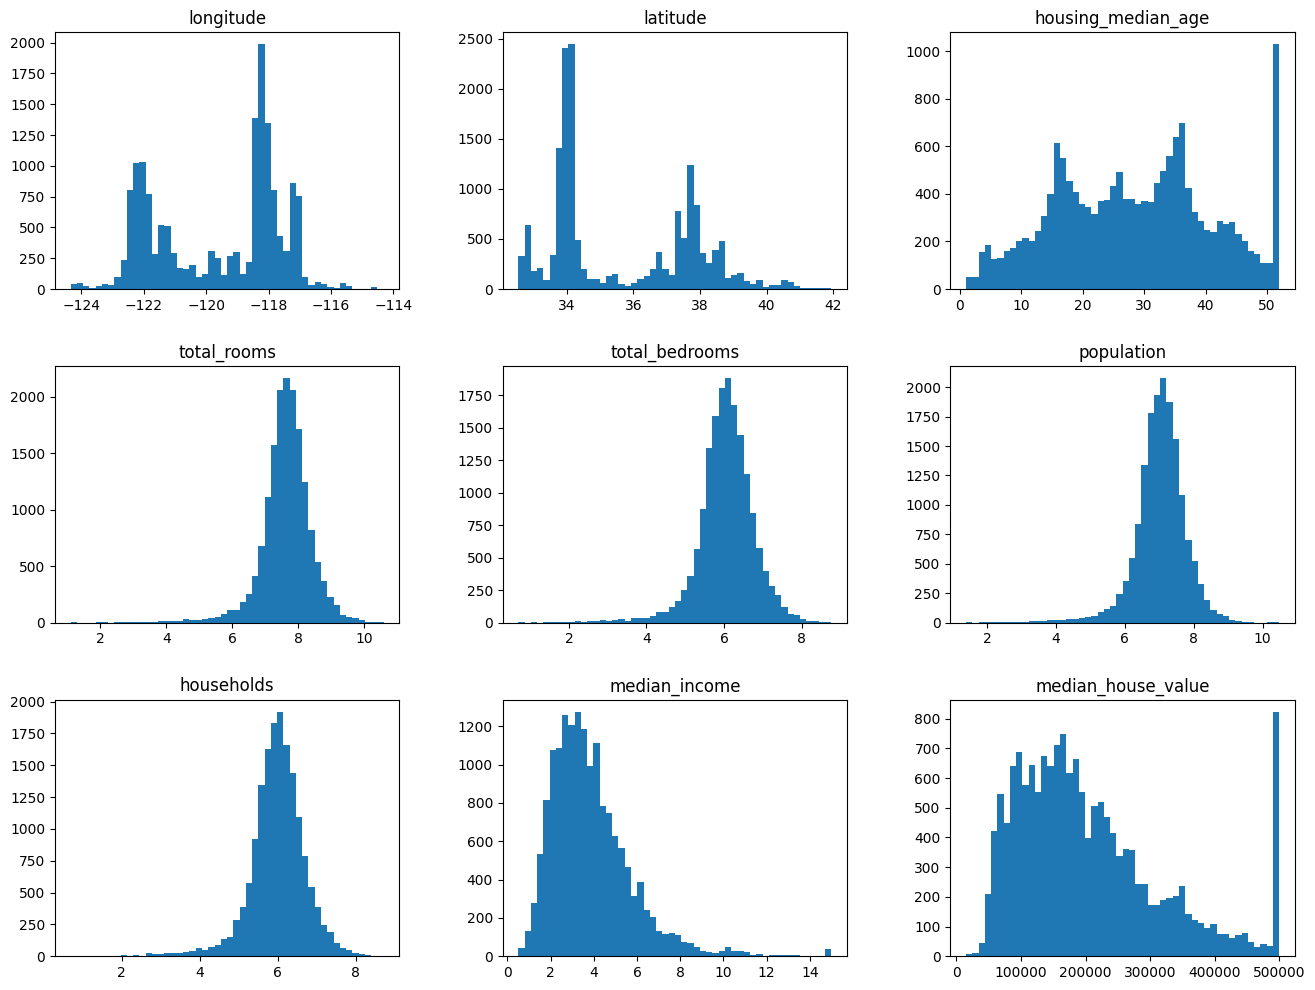

In [84]:
train_df.hist(figsize=(16, 12), bins=50, grid=False)